In [8]:
import spacy
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import xgboost as xgb
import statsmodels.api as sm

In [15]:
file_path = 'C:/Users/ouiou/Documents/training_set_rel3.xlsx'

if os.path.exists(file_path):
    print(f'The file was found: {file_path}')
else:
    print(f'The file was not found: {file_path}')

The file was found: C:/Users/ouiou/Documents/training_set_rel3.xlsx


# Understanding the Dataset

The script reads training_set_rel3 file into a pandas DataFrame, providing an overview, statistical summary, 
and missing values, and examines specific columns for essay text and domain scores.

In [16]:
df = pd.read_excel(file_path)
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,12978.000000,12978.000000,12977.000000,12977.000000,128.000000,12977.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10295.432809,4.179458,4.126840,4.137089,37.828125,6.799723,3.333889,3.330556,3.333889,2.444154,...,2.635689,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,6308.588616,2.136749,4.212537,4.264320,5.240829,8.970558,0.729103,0.726807,0.729103,1.211730,...,1.142566,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,4439.250000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,10045.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,15680.750000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12978 entries, 0 to 12977
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12978 non-null  int64  
 1   essay_set       12978 non-null  int64  
 2   essay           12978 non-null  object 
 3   rater1_domain1  12977 non-null  float64
 4   rater2_domain1  12977 non-null  float64
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12977 non-null  float64
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [19]:
df.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        1
rater2_domain1        1
rater3_domain1    12850
domain1_score         1
rater1_domain2    11178
rater2_domain2    11178
domain2_score     11178
rater1_trait1     10686
rater1_trait2     10686
rater1_trait3     10686
rater1_trait4     10686
rater1_trait5     12255
rater1_trait6     12255
rater2_trait1     10686
rater2_trait2     10686
rater2_trait3     10686
rater2_trait4     10686
rater2_trait5     12255
rater2_trait6     12255
rater3_trait1     12850
rater3_trait2     12850
rater3_trait3     12850
rater3_trait4     12850
rater3_trait5     12850
rater3_trait6     12850
dtype: int64

In [21]:
df['domain1_score'].describe()

count    12977.000000
mean         6.799723
std          8.970558
min          0.000000
25%          2.000000
50%          3.000000
75%          8.000000
max         60.000000
Name: domain1_score, dtype: float64

In [20]:
df['essay'][0]

"Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the econom

# Preparing the Dataset

 The code loads training_set_rel3 into a DataFrame, cleans the 'essay' column by removing strings with '@' and excessive spaces, 
 and creates a new DataFrame 


In [ ]:
file_path = 'C:/Users/ouiou/Documents/training_set_rel3.xlsx'
df = pd.read_excel(file_path)
original_essays = df['essay'].tolist()

def clean_essay(essay):
    # Remove strings that start with '@' followed by uppercase letters and possibly numbers
    essay = re.sub(r'@[A-Z]+[0-9]*', '', essay)

    # Remove extra spaces resulting from the removal
    essay = re.sub(r'\s+', ' ', essay).strip()
    
    return essay

cleaned_essays = [clean_essay(essay) for essay in original_essays]


df_cleaned = pd.DataFrame({
    'ID': df['essay_id'],
    'Original_Essay': original_essays,
    'Cleaned_Essay': cleaned_essays
})


print(df_cleaned.head())

df_cleaned.to_excel('C:/Users/ouiou/Documents/essays_original_cleaned_12024.xlsx', index=False)


In [ ]:
file_path_original = 'C:/Users/ouiou/Documents/training_set_rel3.xlsx'
df_original = pd.read_excel(file_path_original)


file_path_cleaned = 'C:/Users/ouiou/Documents/essays_original_cleaned_12024.xlsx'
df_cleaned = pd.read_excel(file_path_cleaned)


df_merged = pd.merge(df_original, df_cleaned[['ID', 'Cleaned_Essay']], left_on='essay_id', right_on='ID', how='left')


df_merged.drop(columns=['ID'], inplace=True)


columns = list(df_merged.columns)
essay_index = columns.index('essay')  

columns.insert(essay_index + 1, columns.pop(columns.index('Cleaned_Essay')))

df_merged = df_merged.reindex(columns=columns)


output_file_path = 'C:/Users/ouiou/Documents/training_set_rel3_with_cleaned_12024.xlsx'
df_merged.to_excel(output_file_path, index=False)


## Feature Engineering

In [ ]:
import spacy
nlp = spacy.load('en_core_web_md')

The code loads a pre-trained spaCy model for NLP, tokenizes the cleaned essays, and saves the DataFrame with tokenized essays to a new Excel file.

In [ ]:
import spacy
import pandas as pd


nlp = spacy.load('en_core_web_md')


file_path = 'C:/Users/ouiou/Documents/training_set_rel3_with_cleaned_12024.xlsx'
df = pd.read_excel(file_path)

# Function to tokenize an essay
def tokenize_essay(essay):
    doc = nlp(essay)
    return [token.text for token in doc]

# Apply tokenization to the 'Cleaned_Essay' column
df['tokens'] = df['Cleaned_Essay'].apply(tokenize_essay)


columns = list(df.columns)
cleaned_essay_index = columns.index('Cleaned_Essay')  # Get the index of 'Cleaned_Essay'

columns.insert(cleaned_essay_index + 1, columns.pop(columns.index('tokens')))

df = df.reindex(columns=columns)


new_file_path = 'C:/Users/ouiou/Documents/training_set_rel3_with_tokens_12024.xlsx'
df.to_excel(new_file_path, index=False)

print("DataFrame with tokens has been saved to:", new_file_path)


The code normalizes essay scores based on predefined score ranges for each essay set and saves the results to separate Excel files. 
It then combines the normalized scores into a single DataFrame and saves it to a new Excel file.

In [1]:
import pandas as pd

file_path_essays = 'C:/Users/ouiou/Documents/training_set_rel3_with_cleaned_12024.xlsx'
df = pd.read_excel(file_path_essays)

# Dictionary with the score ranges for each essay set
score_ranges = {
    1: {'min': 2, 'max': 12},
    2: {'min': 1, 'max': 6},
    3: {'min': 0, 'max': 3},
    4: {'min': 0, 'max': 3},
    5: {'min': 0, 'max': 4},
    6: {'min': 0, 'max': 4},
    7: {'min': 0, 'max': 30},
    8: {'min': 0, 'max': 60}
}

result_df = pd.DataFrame()

# Process and save each essay set
for essay_set, ranges in score_ranges.items():
    # Filter the DataFrame for the current set
    subset = df[df['essay_set'] == essay_set].copy()

    # Check if max score is not the same as min score to avoid division by zero
    if ranges['max'] != ranges['min']:
        # Apply the normalization formula
        subset['normalized_score'] = (subset['domain1_score'] - ranges['min']) / (ranges['max'] - ranges['min'])
    else:
        # Handle the case where max and min scores are the same (to avoid division by zero)
        subset['normalized_score'] = 0

    # Round the 'normalized_score' column to two decimal places
    subset['normalized_score'] = subset['normalized_score'].round(2)

    # Save the normalized set to a new Excel file with a simplified name
    new_file_path = f'C:/Users/ouiou/Documents/normalize{essay_set}_12024.xlsx'
    subset.to_excel(new_file_path, index=False)

    print(f"Set {essay_set} saved to:", new_file_path)

    # Concatenate the subset to the result DataFrame
    result_df = pd.concat([result_df, subset])

# Reorder columns to have 'normalized_score' next to 'domain1_score'
result_df = result_df[['domain1_score', 'normalized_score'] + [col for col in result_df.columns if col not in ['domain1_score', 'normalized_score']]]

# Save the updated DataFrame to the 'training_set_rel3_normal_all12024.xlsx' file
output_file_path = 'C:/Users/ouiou/Documents/training_set_rel3_normal_all12024.xlsx'
result_df.to_excel(output_file_path, index=False)

print("Combined and saved to:", output_file_path)


Set 1 saved to: C:/Users/ouiou/Documents/normalize1_12024.xlsx
Set 2 saved to: C:/Users/ouiou/Documents/normalize2_12024.xlsx
Set 3 saved to: C:/Users/ouiou/Documents/normalize3_12024.xlsx
Set 4 saved to: C:/Users/ouiou/Documents/normalize4_12024.xlsx
Set 5 saved to: C:/Users/ouiou/Documents/normalize5_12024.xlsx
Set 6 saved to: C:/Users/ouiou/Documents/normalize6_12024.xlsx
Set 7 saved to: C:/Users/ouiou/Documents/normalize7_12024.xlsx
Set 8 saved to: C:/Users/ouiou/Documents/normalize8_12024.xlsx
Combined and saved to: C:/Users/ouiou/Documents/training_set_rel3_normal_all12024.xlsx


In the sections below, we outline a concise approach to developing new features, strategically enriching our dataset for advanced analysis.

In [6]:
import pandas as pd
import spacy

nlp = spacy.load("en_core_web_md")


file_path = 'C:/Users/ouiou/Documents/essays_original_cleaned_12024.xlsx'
training_set_rel3_with_cleaned_12024 = pd.read_excel(file_path)

# Define a function to count words in 'Cleaned_Essay'
def count_words(text):
    # Process the text with spaCy to get a Doc object
    doc = nlp(text)
    # Count the number of tokens that are words (excluding punctuations and spaces)
    word_count = len([token for token in doc if not token.is_punct and not token.is_space])
    return word_count

# Calculate and create a new column 'word_count' with the word count for the entire DataFrame
training_set_rel3_with_cleaned_12024['word_count'] = training_set_rel3_with_cleaned_12024['Cleaned_Essay'].apply(count_words)

# Save the modified DataFrame to a new Excel file
output_file_path = 'C:/Users/ouiou/Documents/essays_original_cleaned_with_word_count_12024.xlsx'
training_set_rel3_with_cleaned_12024.to_excel(output_file_path, index=False)

print(f"New file with word counts saved to: {output_file_path}")


New file with word counts saved to: C:/Users/ouiou/Documents/essays_original_cleaned_with_word_count_12024.xlsx


In [8]:
import pandas as pd
import spacy


nlp = spacy.load("en_core_web_md")


file_path = 'C:/Users/ouiou/Documents/essays_original_cleaned_12024.xlsx'
training_set_rel3_with_cleaned_12024 = pd.read_excel(file_path)

# Define a function to calculate lexical diversity
def lexical_diversity(text):
    # Process the text with spaCy to get a Doc object
    doc = nlp(text)
    
    # Create a set of unique words (excluding punctuations and spaces)
    words = {token.text.lower() for token in doc if not token.is_punct and not token.is_space}
    
    # Count the total number of words (excluding punctuations and spaces)
    total_words = len([token for token in doc if not token.is_punct and not token.is_space])
    
    # Calculate lexical diversity
    diversity = len(words) / total_words if total_words > 0 else 0
    return diversity

# Calculate lexical diversity for the entire DataFrame
training_set_rel3_with_cleaned_12024['lexical_diversity'] = training_set_rel3_with_cleaned_12024['Cleaned_Essay'].apply(lexical_diversity)

# Save the modified DataFrame to a new Excel file
output_file_path = 'C:/Users/ouiou/Documents/essays_original_cleaned_with_lexical_diversity_12024.xlsx'
training_set_rel3_with_cleaned_12024.to_excel(output_file_path, index=False)

print(f"New file with lexical diversities saved to: {output_file_path}")


New file with lexical diversities saved to: C:/Users/ouiou/Documents/essays_original_cleaned_with_lexical_diversity_12024.xlsx


In [9]:
import pandas as pd
import spacy

nlp = spacy.load("en_core_web_md")


file_path = 'C:/Users/ouiou/Documents/essays_original_cleaned_12024.xlsx'
training_set_rel3_with_cleaned_12024 = pd.read_excel(file_path)

# Define a function to calculate the average sentence length
def average_sentence_length(text):
    # Process the text with spaCy to get a Doc object
    doc = nlp(text)
    
    # Split the text into sentences automatically by spaCy
    sentences = list(doc.sents)
    
    # Count the number of sentences and the total number of words
    num_sentences = len(sentences)
    total_words = sum(len(sentence) for sentence in sentences)
    
    # Calculate the average sentence length (total number of words divided by the number of sentences)
    avg_length = total_words / num_sentences if num_sentences > 0 else 0
    return avg_length

# Calculate the average sentence length for the entire DataFrame
training_set_rel3_with_cleaned_12024['avg_sentence_length'] = training_set_rel3_with_cleaned_12024['Cleaned_Essay'].apply(average_sentence_length)

# Save the modified DataFrame to a new Excel file
output_file_path = 'C:/Users/ouiou/Documents/essays_original_cleaned_with_avg_sentence_length_12024.xlsx'
training_set_rel3_with_cleaned_12024.to_excel(output_file_path, index=False)

print(f"New file with average sentence lengths saved to: {output_file_path}")


New file with average sentence lengths saved to: C:/Users/ouiou/Documents/essays_original_cleaned_with_avg_sentence_length_12024.xlsx


In [10]:
from spellchecker import SpellChecker
import pandas as pd
import re

file_path = 'C:/Users/ouiou/Documents/essays_original_cleaned_12024.xlsx'
df = pd.read_excel(file_path)

# Initialize the spell checker
spell = SpellChecker()

# Function to clean and prepare words for spell checking
def clean_word(word):
    # Remove punctuations, except apostrophes in contracted words (like "isn't")
    word = re.sub(r'[^\w\s\']', '', word)
    # Remove isolated quotes
    word = word.replace("'", "") if word.strip("'") == '' else word
    return word

# Function to find spelling errors in an essay
def find_spelling_errors(text):
    words = text.split()
    # Clean each word
    words = [clean_word(word) for word in words]
    # Ignore empty words
    words = [word for word in words if word]
    # Find unknown words
    misspelled = spell.unknown(words)
    return len(misspelled)

# Apply spell checking on all essays
df['spelling_errors'] = df['Cleaned_Essay'].apply(find_spelling_errors)  
# Save the DataFrame with the spelling errors count
new_file_path = 'C:/Users/ouiou/Documents/training_set_with_spelling_errors_12024.xlsx'
df.to_excel(new_file_path, index=False)

print("DataFrame with spelling errors count saved to:", new_file_path)


DataFrame with spelling errors count saved to: C:/Users/ouiou/Documents/training_set_with_spelling_errors_12024.xlsx


The code creates a histogram to visualize the distribution of spelling errors within the essays.

This visualization aids in understanding the frequency and range of spelling mistakes across the essay dataset.

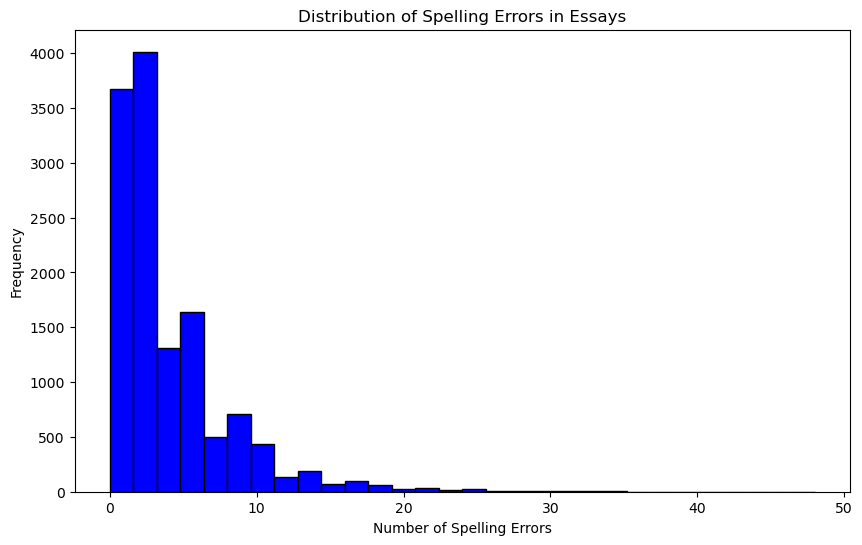

In [13]:
import matplotlib.pyplot as plt
import pandas as pd  

file_path = 'C:/Users/ouiou/Documents/training_set_with_spelling_errors_12024.xlsx'
df = pd.read_excel(file_path)

# Create a histogram of the distribution of spelling errors
plt.figure(figsize=(10, 6))
plt.hist(df['spelling_errors'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Spelling Errors in Essays')
plt.xlabel('Number of Spelling Errors')
plt.ylabel('Frequency')
plt.show()


In [14]:
import spacy
import pandas as pd

# Load the spaCy model
nlp = spacy.load('en_core_web_md')

# Load the spreadsheet with the essays
file_path = 'C:/Users/ouiou/Documents/essays_original_cleaned_12024.xlsx'
df = pd.read_excel(file_path)

# Functions to calculate grammatical complexity
def avg_nouns_per_sentence(text):
    doc = nlp(text)
    noun_counts = [sum(1 for token in sent if token.pos_ == 'NOUN') for sent in doc.sents]
    return sum(noun_counts) / len(noun_counts) if noun_counts else 0

def avg_verbs_per_sentence(text):
    doc = nlp(text)
    verb_counts = [sum(1 for token in sent if token.pos_ == 'VERB') for sent in doc.sents]
    return sum(verb_counts) / len(verb_counts) if verb_counts else 0

def avg_adjectives_per_sentence(text):
    doc = nlp(text)
    adj_counts = [sum(1 for token in sent if token.pos_ == 'ADJ') for sent in doc.sents]
    return sum(adj_counts) / len(adj_counts) if adj_counts else 0

# Apply the functions to calculate the metrics
df['avg_nouns_per_sentence'] = df['Cleaned_Essay'].apply(avg_nouns_per_sentence)
df['avg_verbs_per_sentence'] = df['Cleaned_Essay'].apply(avg_verbs_per_sentence)
df['avg_adjectives_per_sentence'] = df['Cleaned_Essay'].apply(avg_adjectives_per_sentence)

# Save the DataFrame with the new features
new_file_path = 'C:/Users/ouiou/Documents/training_set_with_grammatical_complexity_12024.xlsx'
df.to_excel(new_file_path, index=False)

print("DataFrame with grammatical complexity metrics saved to:", new_file_path)


DataFrame with grammatical complexity metrics saved to: C:/Users/ouiou/Documents/training_set_with_grammatical_complexity_12024.xlsx


The code, in the two sections below, consolidates multiple Excel files containing specific columns of interest related to essay data into a single DataFrame and subsequently saves this compiled data to a new file.

In [23]:
import pandas as pd
import os
from datetime import datetime


directory = 'C:/Users/ouiou/Documents/'

all_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

today = datetime.now().date()

files = [f for f in all_files if datetime.fromtimestamp(os.path.getmtime(os.path.join(directory, f))).date() == today]

columns_of_interest = [
    'ID', 'essay_id', 'essay_set', 'Original_Essay', 'Cleaned_Essay',
    'avg_nouns_per_sentence', 'avg_verbs_per_sentence', 'avg_adjectives_per_sentence',
    'tokens', 'normalized_score', 'word_count', 'lexical_diversity',
    'avg_sentence_length', 'spelling_errors'
]

dfs = []

for file in files:
    df = pd.read_excel(os.path.join(directory, file))
    
    if 'ID' in df.columns:
        df.rename(columns={'ID': 'essay_id'}, inplace=True)
        
   
    if 'essay_id' not in df.columns:
        print(f"Warning: 'essay_id' column not found in {file}. File will be skipped.")
        continue  
    
   
    selected_columns = [col for col in columns_of_interest if col in df.columns]
    df_selected = df[selected_columns]
    dfs.append(df_selected)


if dfs:
    
    final_df = pd.concat(dfs, axis=1)
   
    final_df = final_df.loc[:, ~final_df.columns.duplicated()]
   
    output_file_path = os.path.join(directory, 'final_training_set_26012024.xlsx')
    final_df.to_excel(output_file_path, index=False)

    print("Final DataFrame saved to:", output_file_path)
else:
    print("No files were modified today or no matching columns found.")


Final DataFrame saved to: C:/Users/ouiou/Documents/final_training_set_26012024.xlsx


In [29]:
import pandas as pd
import os

directory = 'C:/Users/ouiou/Documents/'
final_file_path = os.path.join(directory, 'final_training_set_26012024.xlsx')
normalized_score_file_path = os.path.join(directory, 'training_set_rel3_normal_all12024.xlsx')
essay_set_file_path = os.path.join(directory, 'training_set_rel3_with_cleaned_12024.xlsx')

df_final = pd.read_excel(final_file_path)

df_final = df_final.drop(columns=['essay_set', 'normalized_score'], errors='ignore')

df_normalized_score = pd.read_excel(normalized_score_file_path)[['essay_id', 'normalized_score']]
df_essay_set = pd.read_excel(essay_set_file_path)[['essay_id', 'essay_set']]

df_final = df_final.merge(df_normalized_score, on='essay_id', how='left')
df_final = df_final.merge(df_essay_set, on='essay_id', how='left')

output_file_path = os.path.join(directory, 'final_training_set_updated_26012024.xlsx')
df_final.to_excel(output_file_path, index=False)

print("Updated final DataFrame saved to:", output_file_path)


Updated final DataFrame saved to: C:/Users/ouiou/Documents/final_training_set_updated_26012024.xlsx


The code utilizes a Random Forest Regressor from scikit-learn to predict normalized scores based on various essay features. 
It trains the model on the training set, ranks the importance of features, and visualizes them in a bar chart.

Feature Ranking:
1. feature word_count (0.46034637397064876)
2. feature lexical_diversity (0.13629598495864165)
3. feature avg_nouns_per_sentence (0.10030533002102666)
4. feature avg_sentence_length (0.08870126505864213)
5. feature avg_verbs_per_sentence (0.0872105993674438)
6. feature avg_adjectives_per_sentence (0.07350653537716033)
7. feature spelling_errors (0.05363391124643663)


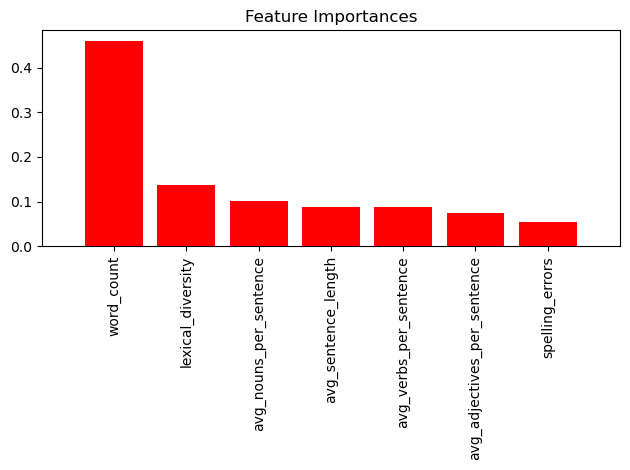

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

file_path_final = 'C:/Users/ouiou/Documents/final_training_set_updated_26012024.xlsx'
df_final = pd.read_excel(file_path_final)


df_final.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinites with NaN
df_final.dropna(inplace=True)  # Remove rows with NaN

# Define the features (X) and the target variable (y)
features = [
    'avg_nouns_per_sentence', 'avg_verbs_per_sentence', 'avg_adjectives_per_sentence',
    'word_count', 'lexical_diversity', 'avg_sentence_length', 'spelling_errors'
]
X = df_final[features]
y = df_final['normalized_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with the training set
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the ranking of the features
print("Feature Ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances in a chart
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()  
plt.show()


The code enhances the predictive model by calculating advanced interaction features from the essay dataset, including lexical density, noun-verb ratio, adjective-noun ratio, spelling error density, and wordiness metrics, which are then incorporated into the dataset and saved to a new Excel file for further analysis.

In [2]:
import pandas as pd
import numpy as np

file_path = 'C:/Users/ouiou/Documents/final_training_set_updated_26012024.xlsx'
df = pd.read_excel(file_path)

# Calculate interaction features
df['lexical_density'] = df['lexical_diversity'] * df['word_count']
df['noun_verb_ratio'] = df['avg_nouns_per_sentence'] / df['avg_verbs_per_sentence']
df['adjective_noun_ratio'] = df['avg_adjectives_per_sentence'] / df['avg_nouns_per_sentence']
df['spelling_error_density'] = df['spelling_errors'] / df['word_count']
df['wordiness'] = df['word_count'] / df['avg_sentence_length']


df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)


output_file_path = 'C:/Users/ouiou/Documents/final_training_set_with_interactions_26012024.xlsx'
df.to_excel(output_file_path, index=False)



DataFrame com características de interação salvo em: C:/Users/ouiou/Documents/final_training_set_with_interactions_26012024.xlsx


The code calculates and displays the Pearson correlation coefficients for essay features, including newly created interaction features, with the normalized scores, highlighting their positive or negative influence on the outcomes.

In [3]:
import pandas as pd
import numpy as np

file_path = 'C:/Users/ouiou/Documents/final_training_set_with_interactions_26012024.xlsx'
df = pd.read_excel(file_path)

correlation_matrix = df.corr() 
target_correlation = correlation_matrix['normalized_score'].sort_values(ascending=False)

print("Correlation of features with the final score:")
print(target_correlation)


Correlação das características com a nota final:
normalized_score               1.000000
lexical_density                0.375100
word_count                     0.287250
wordiness                      0.266645
avg_adjectives_per_sentence    0.127544
spelling_errors                0.118721
noun_verb_ratio                0.087816
adjective_noun_ratio           0.048375
essay_set                      0.029908
essay_id                       0.029675
avg_nouns_per_sentence         0.026582
avg_sentence_length           -0.031072
avg_verbs_per_sentence        -0.122496
spelling_error_density        -0.163593
lexical_diversity             -0.296385
Name: normalized_score, dtype: float64


The code performs a statistical analysis on essay features, calculating means and standard deviations for each essay set, and conducts ANOVA tests to explore significant differences across essay types based on features. ANOVA results are displayed to identify which features significantly vary between essay sets, indicating the impact of these features on essay evaluation.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'C:/Users/ouiou/Documents/final_training_set_with_interactions_26012024.xlsx'
df = pd.read_excel(file_path)

# List of features for analysis
features = [
    'lexical_density', 'word_count', 'wordiness',
    'avg_adjectives_per_sentence', 'spelling_errors',
    'noun_verb_ratio', 'adjective_noun_ratio',
    'spelling_error_density', 'avg_sentence_length',
    'avg_verbs_per_sentence', 'lexical_diversity'
]

# Calculate means and standard deviations for each 'essay_set'
grouped = df.groupby('essay_set')
means = grouped[features].mean()
std_devs = grouped[features].std()

# Display the statistics for each type of essay
print("Means by essay type:")
print(means)
print("\nStandard deviations by essay type:")
print(std_devs)

# ANOVA test for each feature
anova_results = {}
for feature in features:
    anova_results[feature] = stats.f_oneway(
        *[group[feature].dropna() for name, group in grouped]
    )

# Display the ANOVA results
print("\nANOVA results by feature:")
for feature, result in anova_results.items():
    print(f"{feature}: F={result.statistic:.2f}, p={result.pvalue:.3f}")

Means by essay type:
           lexical_density  word_count  wordiness  \
essay_set                                           
1               162.464947  361.586091  20.848139   
2               158.063333  382.143889  19.075397   
3                68.601976  109.389890   5.778236   
4                56.543245   94.849067   4.359392   
5                70.934335  121.550918   6.149423   
6                90.348552  153.629733   7.278992   
7                86.143403  162.754621  11.469304   
8               237.564315  591.037344  32.736056   

           avg_adjectives_per_sentence  spelling_errors  noun_verb_ratio  \
essay_set                                                                  
1                             1.061342         6.969714         1.462924   
2                             1.190609         7.198889         1.322963   
3                             1.173691         2.095293         1.583177   
4                             0.903864         2.003957         1.18

The code calculates and organizes the correlation coefficients between various essay features, including interaction features, and the essays' normalized scores for each essay set. It then displays these correlations group-wise, revealing how different features influence the final scores within distinct essay categories.

In [5]:
file_path = 'C:/Users/ouiou/Documents/final_training_set_with_interactions_26012024.xlsx'
df = pd.read_excel(file_path)

# List of features for analysis
features = [
    'lexical_density', 'word_count', 'wordiness',
    'avg_adjectives_per_sentence', 'spelling_errors',
    'noun_verb_ratio', 'adjective_noun_ratio',
    'spelling_error_density', 'avg_sentence_length',
    'avg_verbs_per_sentence', 'lexical_diversity'
]

# Calculate the correlation of these features with the final score for each essay group
correlation_by_group = {}
for group in df['essay_set'].unique():
    group_data = df[df['essay_set'] == group]
    correlation_by_group[group] = group_data[features + ['normalized_score']].corr()['normalized_score'].sort_values(ascending=False)

# Display the correlations for each group
for group, correlations in correlation_by_group.items():
    print(f"\nCorrelações para o grupo {group}:")
    print(correlations)



Correlações para o grupo 1:
normalized_score               1.000000
lexical_density                0.824983
word_count                     0.786536
wordiness                      0.688826
spelling_errors                0.232550
noun_verb_ratio                0.094751
adjective_noun_ratio           0.033039
avg_adjectives_per_sentence   -0.027771
avg_sentence_length           -0.124153
spelling_error_density        -0.171297
avg_verbs_per_sentence        -0.174783
lexical_diversity             -0.364386
Name: normalized_score, dtype: float64

Correlações para o grupo 2:
normalized_score               1.000000
lexical_density                0.695927
word_count                     0.652134
wordiness                      0.616287
noun_verb_ratio                0.163648
adjective_noun_ratio           0.067687
spelling_errors                0.053531
avg_adjectives_per_sentence    0.049766
avg_sentence_length           -0.072119
avg_verbs_per_sentence        -0.125886
spelling_error_density 

The code performs linear regression analysis for each essay set within a dataset, incorporating a range of textual features as independent variables to predict normalized scores. It utilizes the statsmodels library to fit and evaluate the models, systematically organizing and displaying the regression summaries for each essay group, offering insights into the relationships between textual features and essay scores.

In [7]:
!pip install statsmodels
import pandas as pd
import statsmodels.api as sm

file_path = 'C:/Users/ouiou/Documents/final_training_set_with_interactions_26012024.xlsx'
df = pd.read_excel(file_path)

# Define the list of features that will be included as independent variables
features = [
    'lexical_density', 'word_count', 'wordiness',
    'avg_adjectives_per_sentence', 'spelling_errors',
    'noun_verb_ratio', 'adjective_noun_ratio',
    'spelling_error_density', 'avg_sentence_length',
    'avg_verbs_per_sentence', 'lexical_diversity'
]

# Perform linear regression for each essay group
regression_results = {}
for group in df['essay_set'].unique():
    # Filter the DataFrame by the current group
    group_data = df[df['essay_set'] == group]
    
    # Add a constant to the dataset (necessary for statsmodels)
    X = sm.add_constant(group_data[features])
    y = group_data['normalized_score']
    
  # Fit the linear regression model
    model = sm.OLS(y, X).fit()
    
     # Save the results in the dictionary
    regression_results[group] = model

# Display the regression results for each group
for group, model in regression_results.items():
    print(f"\nResultados da Regressão para o grupo {group}:")
    print(model.summary())



Resultados da Regressão para o grupo 1:
                            OLS Regression Results                            
Dep. Variable:       normalized_score   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     426.7
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:15:52   Log-Likelihood:                 1962.2
No. Observations:                1783   AIC:                            -3900.
Df Residuals:                    1771   BIC:                            -3834.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

The code segments essay data by set, applies linear regression to forecast normalized scores using textual features, and evaluates model efficacy via MSE and R² on test subsets. This approach highlights the predictive accuracy and explanatory capacity of the models tailored to each essay category.

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

file_path = 'C:/Users/ouiou/Documents/final_training_set_with_interactions_26012024.xlsx'
df = pd.read_excel(file_path)

groups_to_analyze = [1, 2, 3, 4, 5, 6, 7, 8]

features = ['lexical_density', 'word_count', 'wordiness', 'avg_adjectives_per_sentence', 'spelling_errors', 'noun_verb_ratio', 'adjective_noun_ratio', 'spelling_error_density', 'avg_sentence_length', 'avg_verbs_per_sentence', 'lexical_diversity']

for group in groups_to_analyze:
    # Filtering the data for the current group
    df_group = df[df['essay_set'] == group]
    
    X = df_group[features]
    y = df_group['normalized_score']
    
    # Adding a constant for the intercept
    X = sm.add_constant(X)
    
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fitting the linear regression model to the training data of the current group
    model = sm.OLS(y_train, X_train).fit()
    
    # Using the fitted model to make predictions on the test data of the current group
    y_pred = model.predict(X_test)
    
    # Calculating error metrics to evaluate the performance of the model for the current group
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Displaying the performance metrics
    print(f"Group {group} - MSE: {mse}, R^2: {r2}")


Group 1 - MSE: 0.005907616779277218, R^2: 0.7404798528532668
Group 2 - MSE: 0.010590292042589699, R^2: 0.5369176984183947
Group 3 - MSE: 0.04228344705305406, R^2: 0.44603133243056436
Group 4 - MSE: 0.03928266144082934, R^2: 0.6129733893078607
Group 5 - MSE: 0.019788802786762927, R^2: 0.6865690888363676
Group 6 - MSE: 0.030927126987053244, R^2: 0.5226645836625436
Group 7 - MSE: 0.01018969539364541, R^2: 0.5543534163910252
Group 8 - MSE: 0.004004840246761437, R^2: 0.4845050728769694


The code optimizes a GradientBoostingRegressor model using GridSearchCV to meticulously search for the best hyperparameters across a predefined grid. By fitting the model on the training set and evaluating its performance on a test set through MSE and R² metrics, it enhances predictive accuracy for the dataset as a whole, without differentiation among essay groups.

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

gbm = GradientBoostingRegressor(random_state=42)

param_grid_gbm = {
    'n_estimators': [100, 200],  
    'max_depth': [3, 5, 10],  
    'learning_rate': [0.01, 0.1],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2]  
}

cv_gbm = GridSearchCV(gbm, param_grid_gbm, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

cv_gbm.fit(X_train, y_train)

print("Best Hyperparameters fo GBM:", cv_gbm.best_params_)

y_pred_gbm = cv_gbm.predict(X_test)

mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print(f"MSE para GBM: {mse_gbm}, R² para GBM: {r2_gbm}")


Melhores Hiperparâmetros para GBM: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
MSE para GBM: 0.012032183135256202, R² para GBM: 0.47386804472265565


In [14]:
!pip install torch torchvision torchaudio

     ------------------------------------ 198.5/198.5 MB 892.6 kB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 732.1 kB/s eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 592.3 kB/s eta 0:00:00


In [19]:
!pip install torchtext

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torchtext.data.utils import get_tokenizer  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score

df = pd.read_excel('C:/Users/ouiou/Documents/final_training_set_with_interactions_26012024.xlsx')



     ---------------------------------------- 1.9/1.9 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 2.3 MB/s eta 0:00:00


The code implements a custom deep learning model using PyTorch to predict essay scores directly from text data. It involves tokenizing essays, training a neural network with embedding and linear layers on the training set, and optimizing the model's parameters to minimize prediction error.

In [20]:
tokenizer = get_tokenizer('basic_english')

In [21]:
all_tokens = [token for tokens_list in df['tokens'] for token in tokens_list]
vocab = {token: idx + 1 for idx, token in enumerate(set(all_tokens))} 

df['token_indices'] = df['tokens'].apply(lambda tokens: [vocab[token] for token in tokens])


In [22]:
class EssayDataset(Dataset):
    def __init__(self, essays, scores):
        self.essays = essays
        self.scores = scores
    
    def __len__(self):
        return len(self.essays)
    
    def __getitem__(self, idx):
        return torch.tensor(self.essays[idx], dtype=torch.long), torch.tensor(self.scores[idx], dtype=torch.float)

def collate_fn(batch):
    essays, scores = zip(*batch)
    essays_padded = pad_sequence(essays, batch_first=True, padding_value=0)
    scores_tensor = torch.tensor(scores, dtype=torch.float)
    return essays_padded, scores_tensor


X_train, X_test, y_train, y_test = train_test_split(df['token_indices'].tolist(), df['normalized_score'].tolist(), test_size=0.2, random_state=42)


train_dataset = EssayDataset(X_train, y_train)
test_dataset = EssayDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)


In [23]:
class EssayModel(nn.Module):
    def __init__(self, vocab_size, embed_dim=64, output_dim=1):
        super(EssayModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size + 1, embed_dim)  # +1 para padding_idx
        self.fc = nn.Linear(embed_dim, output_dim)
        
    def forward(self, x):
        x = self.embedding(x).mean(dim=1)
        return self.fc(x)

model = EssayModel(len(vocab))


In [24]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

for epoch in range(5):  
    model.train()
    for essays, scores in train_loader:
        optimizer.zero_grad()
        outputs = model(essays).squeeze(1)
        loss = criterion(outputs, scores)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 0.06347833573818207
Epoch 2, Loss: 0.04116852208971977
Epoch 3, Loss: 0.05364910513162613
Epoch 4, Loss: 0.05609537288546562
Epoch 5, Loss: 0.0507187582552433


The code extends previous essay score prediction efforts by training separate neural network models for each essay group, achieving nuanced understanding through group-specific performance metrics, including Cohen's Kappa Scores, which highlight the distinct predictive accuracy for each category.


In [27]:
grouped_df = df.groupby('essay_set')


In [28]:
from torch.utils.data.dataset import random_split

datasets = {}
dataloaders = {}
split_ratio = 0.8  

for group, group_df in grouped_df:
        
    dataset = EssayDataset(group_df['token_indices'].tolist(), group_df['normalized_score'].tolist())
    
    train_size = int(split_ratio * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
    
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)
    
    dataloaders[group] = (train_loader, test_loader)


In [29]:
models = {}
kappa_scores = {}

for group, (train_loader, test_loader) in dataloaders.items():
    print(f"Treinando o modelo para o grupo {group}")    
  
    model = EssayModel(len(vocab))  
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()    
  
    for epoch in range(5): 
        model.train()
        for essays, scores in train_loader:
            optimizer.zero_grad()
            outputs = model(essays).squeeze(1)
            loss = criterion(outputs, scores)
            loss.backward()
            optimizer.step()
        print(f'Grupo {group}, Epoch {epoch+1}, Loss: {loss.item()}')
    
    models[group] = model  
    
    model.eval()
    y_pred, y_true = [], []
    with torch.no_grad():
        for essays, scores in test_loader:
            outputs = model(essays).squeeze(1)
            y_pred.extend(outputs.numpy())
            y_true.extend(scores.numpy())

    kappa_score = cohen_kappa_score(np.rint(y_true), np.rint(y_pred), weights='quadratic')
    kappa_scores[group] = kappa_score
    print(f"Grupo {group}, Cohen's Kappa Score: {kappa_score}")


Treinando o modelo para o grupo 1
Grupo 1, Epoch 1, Loss: 0.02115757018327713
Grupo 1, Epoch 2, Loss: 0.01966685615479946
Grupo 1, Epoch 3, Loss: 0.040346380323171616
Grupo 1, Epoch 4, Loss: 0.01801898516714573
Grupo 1, Epoch 5, Loss: 0.009801904670894146
Grupo 1, Cohen's Kappa Score: 0.6217418944691673
Treinando o modelo para o grupo 2
Grupo 2, Epoch 1, Loss: 0.027013439685106277
Grupo 2, Epoch 2, Loss: 0.00858576875180006
Grupo 2, Epoch 3, Loss: 0.02800903655588627
Grupo 2, Epoch 4, Loss: 0.007111407816410065
Grupo 2, Epoch 5, Loss: 0.017891880124807358
Grupo 2, Cohen's Kappa Score: 0.4889519812368843
Treinando o modelo para o grupo 3
Grupo 3, Epoch 1, Loss: 0.045323386788368225
Grupo 3, Epoch 2, Loss: 0.013876575976610184
Grupo 3, Epoch 3, Loss: 0.020071256905794144
Grupo 3, Epoch 4, Loss: 0.0326424315571785
Grupo 3, Epoch 5, Loss: 0.0195939801633358
Grupo 3, Cohen's Kappa Score: 0.5673734610123119
Treinando o modelo para o grupo 4
Grupo 4, Epoch 1, Loss: 0.03533933684229851
Grupo 4

The code performs vectorization of all essay sets, and predictive modeling using a Random Forest Regressor, applying optimal hyperparameters found through GridSearchCV to minimize MSE for each distinct essay set.

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_excel('C:/Users/ouiou/Documents/final_training_set_with_interactions_26012024.xlsx')

vectorizer = CountVectorizer(max_features=5000)

best_params = {
    'max_depth': None,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 100,
    'random_state': 42
}

for group in range(1, 9):  
    print(f"Processando essay_set {group}...")
    df_group = df[df['essay_set'] == group]    

    texts = df_group['Cleaned_Essay'] 
    scores = df_group['normalized_score']      

    X_train, X_test, y_train, y_test = train_test_split(texts, scores, test_size=0.2, random_state=42)    
 
    X_train_vec = vectorizer.fit_transform(X_train).toarray()
    X_test_vec = vectorizer.transform(X_test).toarray()    
   
    rf_regressor = RandomForestRegressor(**best_params)
    rf_regressor.fit(X_train_vec, y_train)    

    y_pred = rf_regressor.predict(X_test_vec)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE para essay_set {group}: {mse}\n")


Processando essay_set 1...
MSE para essay_set 1: 0.008344170295410059

Processando essay_set 2...
MSE para essay_set 2: 0.011453932710464791

Processando essay_set 3...
MSE para essay_set 3: 0.042846433937585235

Processando essay_set 4...
MSE para essay_set 4: 0.032641180227974846

Processando essay_set 5...
MSE para essay_set 5: 0.020040170794843305

Processando essay_set 6...
MSE para essay_set 6: 0.02107956470492727

Processando essay_set 7...
MSE para essay_set 7: 0.010241295845531134

Processando essay_set 8...
MSE para essay_set 8: 0.00480025267935381



In [2]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

df = pd.read_excel('C:/Users/ouiou/Documents/final_training_set_with_interactions_26012024.xlsx')

vectorizer = CountVectorizer(max_features=5000)

for group in range(1, 9):  # De 1 a 8 para os grupos de redações
    print(f"Processando essay_set {group}...")
    df_group = df[df['essay_set'] == group]
    
    texts = df_group['Cleaned_Essay']  
    scores = df_group['normalized_score']  
    
    X_train, X_test, y_train, y_test = train_test_split(texts, scores, test_size=0.2, random_state=42)
    
    X_train_vec = vectorizer.fit_transform(X_train).toarray()
    X_test_vec = vectorizer.transform(X_test).toarray()
    
    svr_regressor = SVR(C=1.0, epsilon=0.2)  
    svr_regressor.fit(X_train_vec, y_train)
    
    y_pred = svr_regressor.predict(X_test_vec)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE para essay_set {group}: {mse}")


Processando essay_set 1...
MSE para essay_set 1: 0.007856258211013937
Processando essay_set 2...
MSE para essay_set 2: 0.012201229687287136
Processando essay_set 3...
MSE para essay_set 3: 0.04437651878579457
Processando essay_set 4...
MSE para essay_set 4: 0.02917532469590598
Processando essay_set 5...
MSE para essay_set 5: 0.019031479051409145
Processando essay_set 6...
MSE para essay_set 6: 0.020338668324711314
Processando essay_set 7...
MSE para essay_set 7: 0.012324186529665007
Processando essay_set 8...
MSE para essay_set 8: 0.005865153096381405


The code visualizes the Mean Squared Error (MSE) of essay scoring predictions using Random Forest and SVR algorithms across all essay sets, comparing their performance through a bar chart with annotated values for clear comparison.

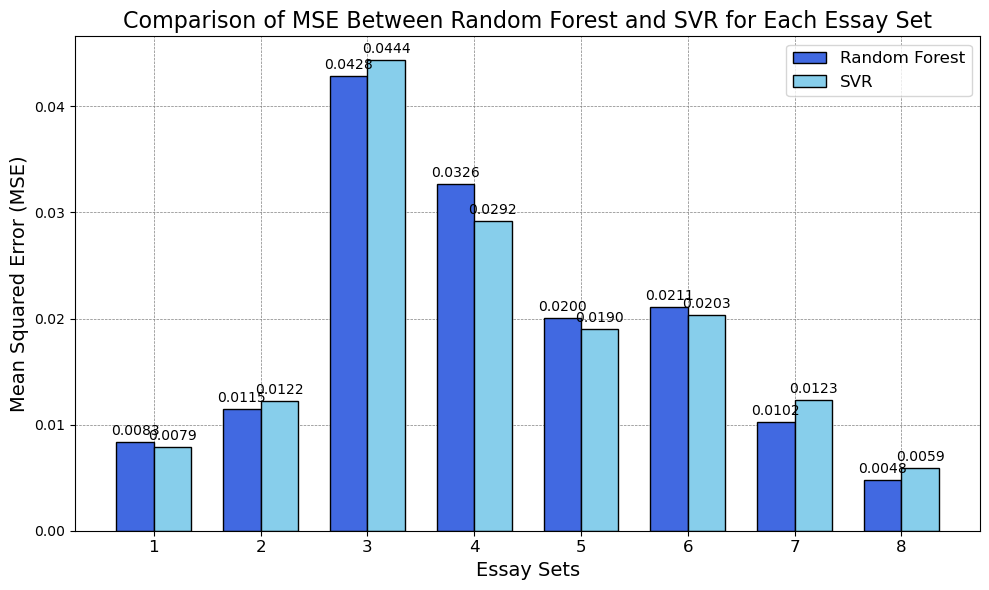

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the MSE results for Random Forest and SVR from the previously obtained output
mse_results = {
    "Random Forest": [0.008344170295410059, 0.011453932710464791, 0.042846433937585235, 0.032641180227974846, 0.020040170794843305, 0.02107956470492727, 0.010241295845531134, 0.00480025267935381],
    "SVR": [0.007856258211013937, 0.012201229687287136, 0.04437651878579457, 0.02917532469590598, 0.019031479051409145, 0.020338668324711314, 0.012324186529665007, 0.005865153096381405]
}

# Essay set labels
essay_sets = ["1", "2", "3", "4", "5", "6", "7", "8"]

# Setup for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Generate bar positions
bar_width = 0.35
index = np.arange(len(essay_sets))

# Plotting both Random Forest and SVR MSE results
bar1 = ax.bar(index - bar_width/2, mse_results["Random Forest"], bar_width, label="Random Forest", color='royalblue', edgecolor='black')
bar2 = ax.bar(index + bar_width/2, mse_results["SVR"], bar_width, label="SVR", color='skyblue', edgecolor='black')

# Adding the aesthetics
ax.set_xlabel('Essay Sets', fontsize=14)
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=14)
ax.set_title('Comparison of MSE Between Random Forest and SVR for Each Essay Set', fontsize=16)
ax.set_xticks(index)
ax.set_xticklabels(essay_sets, fontsize=12)
ax.legend(fontsize=12)
ax.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
ax.set_axisbelow(True)

# Adding the text labels on the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bar1)
add_labels(bar2)

# Show plot
plt.tight_layout()
plt.show()


The code implements a deep learning pipeline for essay scoring using PyTorch and Word2Vec embeddings. 
It transforms essays into tensor representations with pre-trained Word2Vec models, processes them through an LSTM-based neural network to capture textual nuances, and predicts scores. 
The model is trained with MSE loss over 20 epochs, showing progressive learning through decreasing loss values.


In [15]:
from gensim.models import KeyedVectors
word2vec_path = 'C:/Users/ouiou/Documents/word2vecmodel.bin'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)


In [30]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors


In [31]:
df = pd.read_excel('C:/Users/ouiou/Documents/final_training_set_with_interactions_26012024.xlsx')

word2vec = KeyedVectors.load_word2vec_format('C:/Users/ouiou/Documents/word2vecmodel.bin', binary=True)

def essay_to_tensor(essay):
    tokens = essay.split()
    indices = [word2vec.key_to_index.get(token, 0) for token in tokens]
    return torch.tensor(indices, dtype=torch.long)

class EssayDataset(Dataset):
    def __init__(self, essays, scores):
        self.essays = [essay_to_tensor(essay) for essay in essays]
        self.scores = torch.tensor(scores, dtype=torch.float)
    
    def __len__(self):
        return len(self.scores)
    
    def __getitem__(self, idx):
        return self.essays[idx], self.scores[idx]

dataset = EssayDataset(df['Cleaned_Essay'], df['normalized_score'])


In [32]:
def collate_fn(batch):
    essays, scores = zip(*batch)
    essays_padded = pad_sequence(essays, batch_first=True)
    scores_tensor = torch.stack(scores)
    return essays_padded, scores_tensor

data_loader = DataLoader(dataset, batch_size=64, shuffle=True, collate_fn=collate_fn)


In [33]:
class EssayScoringModel(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size):
        super(EssayScoringModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight.data.copy_(torch.from_numpy(word2vec.vectors))  
        self.embedding.weight.requires_grad = False  
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        x = self.embedding(x)
        _, (hidden, _) = self.lstm(x)
        x = self.dropout(hidden[-1])
        x = self.fc(x)
        return x

vocab_size = len(word2vec.vectors)
embedding_dim = word2vec.vector_size
model = EssayScoringModel(embedding_dim, hidden_dim=64, vocab_size=vocab_size)


In [34]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(20):  
    epoch_loss = 0
    for essays, scores in data_loader:
        optimizer.zero_grad()
        outputs = model(essays)
        loss = criterion(outputs.squeeze(), scores)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {epoch_loss / len(data_loader)}')


Epoch 1, Loss: 0.06937519394852258
Epoch 2, Loss: 0.060311527601603805
Epoch 3, Loss: 0.05935465613279143
Epoch 4, Loss: 0.059198037982721045
Epoch 5, Loss: 0.058866758211492905
Epoch 6, Loss: 0.05801786858533404
Epoch 7, Loss: 0.05735680226034719
Epoch 8, Loss: 0.057173255950285884
Epoch 9, Loss: 0.0571158608339103
Epoch 10, Loss: 0.05678125401142196
Epoch 11, Loss: 0.0565907998845495
Epoch 12, Loss: 0.056282657102264204
Epoch 13, Loss: 0.05594206271059995
Epoch 14, Loss: 0.05570506133836479
Epoch 15, Loss: 0.055778826729123814
Epoch 16, Loss: 0.055404481280760226
Epoch 17, Loss: 0.055347118003688425
Epoch 18, Loss: 0.0553882198655987
Epoch 19, Loss: 0.05530241790590028
Epoch 20, Loss: 0.05526725428518403


The code leverages a pre-reduced Word2Vec model for embedding, trains an LSTM neural network up to 50 epochs using PyTorch, and employs a custom dataset and dataloader to efficiently process and predict scores for cleaned essay.

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torch import nn, optim
import numpy as np
from gensim.models import KeyedVectors
import pandas as pd

embedding_dim = 50  
hidden_dim = 32  

df = pd.read_excel('C:/Users/ouiou/Documents/final_training_set_with_interactions_26012024.xlsx')
word2vec = KeyedVectors.load_word2vec_format('C:/Users/ouiou/Documents/reduced_word2vecmodel.bin', binary=True)

def essay_to_tensor(essay):
    tokens = essay.split()
    indices = [word2vec.key_to_index.get(token, 0) for token in tokens]
    return torch.tensor(indices, dtype=torch.long)

def collate_fn(batch):
    essays, scores = zip(*batch)
    essays_padded = pad_sequence(essays, batch_first=True)
    scores_tensor = torch.stack(scores)
    return essays_padded, scores_tensor

class EssayDataset(Dataset):
    def __init__(self, essays, scores):
        self.essays = [essay_to_tensor(essay) for essay in essays]
        self.scores = torch.tensor(scores, dtype=torch.float)
    
    def __len__(self):
        return len(self.scores)
    
    def __getitem__(self, idx):
        return self.essays[idx], self.scores[idx]

dataset = EssayDataset(df['Cleaned_Essay'], df['normalized_score'])
data_loader = DataLoader(dataset, batch_size=128, shuffle=True, collate_fn=collate_fn)

class EssayScoringModel(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size):
        super(EssayScoringModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight.data.copy_(torch.from_numpy(word2vec.vectors))  
        self.embedding.weight.requires_grad = False  
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        x = self.embedding(x)
        _, (hidden, _) = self.lstm(x)
        x = self.fc(hidden[-1])
        return x

device = torch.device("cpu")

model = EssayScoringModel(embedding_dim, hidden_dim, len(word2vec.vectors)).to(device)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.002)

for epoch in range(50):  
    epoch_loss = 0
    for essays, scores in data_loader:
        essays, scores = essays.to(device), scores.to(device)
        optimizer.zero_grad()
        outputs = model(essays)
        loss = criterion(outputs.squeeze(), scores)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_epoch_loss = epoch_loss / len(data_loader)
    print(f'Epoch {epoch+1}, Loss: {avg_epoch_loss}')

Epoch 1, Loss: 0.07935161936078586
Epoch 2, Loss: 0.055493317909684835
Epoch 3, Loss: 0.055568044639977755
Epoch 4, Loss: 0.05542464744226605
Epoch 5, Loss: 0.05513619651616204
Epoch 6, Loss: 0.05536168901359334
Epoch 7, Loss: 0.05526137114593796
Epoch 8, Loss: 0.05511180001000563
Epoch 9, Loss: 0.05522509704471803
Epoch 10, Loss: 0.05519707194145988
Epoch 11, Loss: 0.05505362229750437
Epoch 12, Loss: 0.05520792688955279
Epoch 13, Loss: 0.05542627130361164
Epoch 14, Loss: 0.05511125746895285
Epoch 15, Loss: 0.055465255991793146
Epoch 16, Loss: 0.05525506302422168
Epoch 17, Loss: 0.05507772324570254
Epoch 18, Loss: 0.05524985305964947
Epoch 19, Loss: 0.055372754111886024
Epoch 20, Loss: 0.0552773600553765
Epoch 21, Loss: 0.05510929329138176
Epoch 22, Loss: 0.05518276525624827
Epoch 23, Loss: 0.055296714691554796
Epoch 24, Loss: 0.05503584780529434
Epoch 25, Loss: 0.05517061639065836
Epoch 26, Loss: 0.05514128875060409
Epoch 27, Loss: 0.05510768648602214
Epoch 28, Loss: 0.055144818390116